In this project I analyze some test results of patients who are participating in a study on heart infarction. In it I analyze how the results of these tests show some factors that can increase the chance of a heart attack

### Features: 
#### the medical description of all features was achieved with the help of some discussions on Kaggle 
- **Age** : Age of the patient
- **Sex** : Sex of the patient
- **cp** : Chest Pain type
    - Value 0: typical angina
    - Value 1: atypical angina
    - Value 2: non-anginal pain
    - Value 3: asymptomatic
- **trtbps** : resting blood pressure (in mm Hg)
- **chol** : cholesterol in mg/dl fetched via BMI sensor
- **fbs**: (fasting blood sugar > 120 mg/dl)
    - 0: False
    - 1: True
- **rest_ecg** : resting electrocardiographic result
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- **thalach** : maximum heart rate achieved
- **exang** : exercise induced angina
    - 0: No
    - 1: Yes
- **old peak** : ST depression induced by exercise relative to rest
- **slp** : the slope of the peak exercise ST segment
    - 0: unsloping
    - 1: flat
    - 2: downsloping
- **caa** : number of major vessels (0-3)
- **thall** : thalassemia
    - 0: null
    - 1: fixed defect
    - 2: normal
    - 3: reversable defect
- **output**: diagnosis of heart disease (angiographic disease status)
    - 0: < 50% diameter narrowing. less chance of heart disease
    - 1: > 50% diameter narrowing. more chance of heart disease

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('husl')
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,  StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import os
from sklearn.metrics import auc, precision_recall_curve, log_loss,confusion_matrix, recall_score, precision_score
from sklearn.compose import ColumnTransformer

In [2]:
df_heart = df = pd.read_csv("heart.csv")
df_saturation = pd.read_csv("o2Saturation.csv")

### Let´s analyse the dataset

In [3]:
df_heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df_heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# let´s check if the dataset is balanced 

df_heart['output'].value_counts(normalize = True)

1    0.544554
0    0.455446
Name: output, dtype: float64

We can realize that the data arent unbalanced , so we don´t need to reajust this part

In [7]:
# check if we have null values
df_heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

### Analysing the Features

In [28]:
# Based in the Features description we can divide then into this two categories:
numeric_col=['age' , 'trtbps' , 'chol', 'thalachh', 'oldpeak']
categorical_col=['sex', 'cp','fbs','restecg', 'exng', 'slp', 'caa','thall']

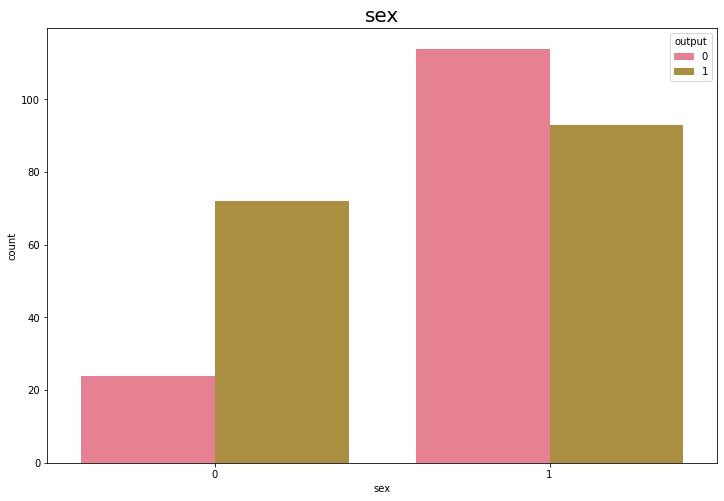

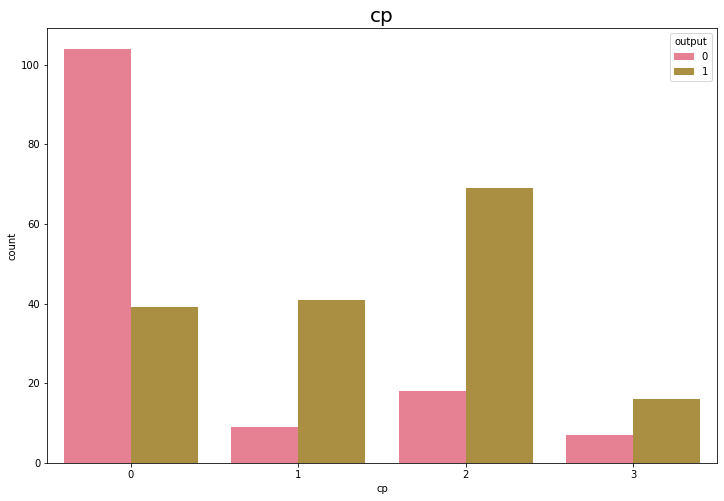

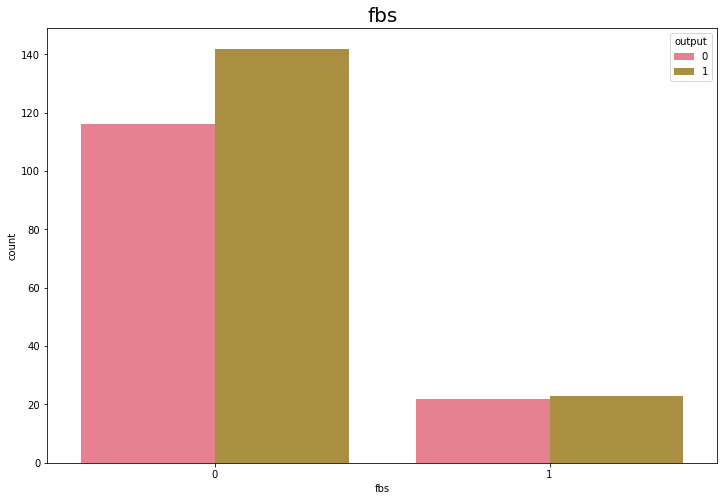

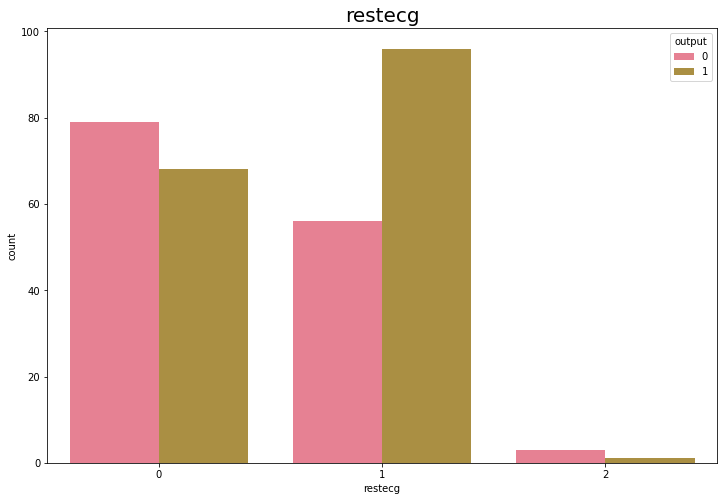

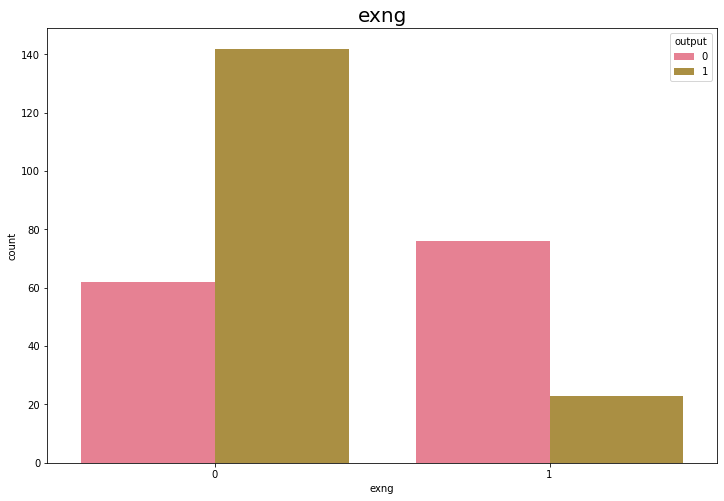

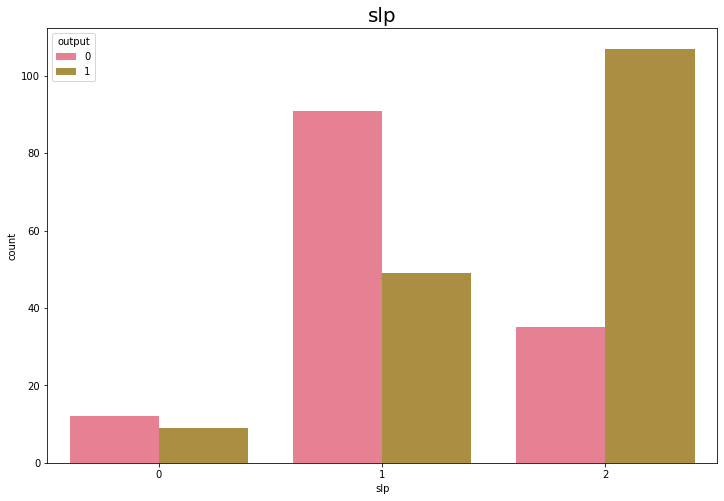

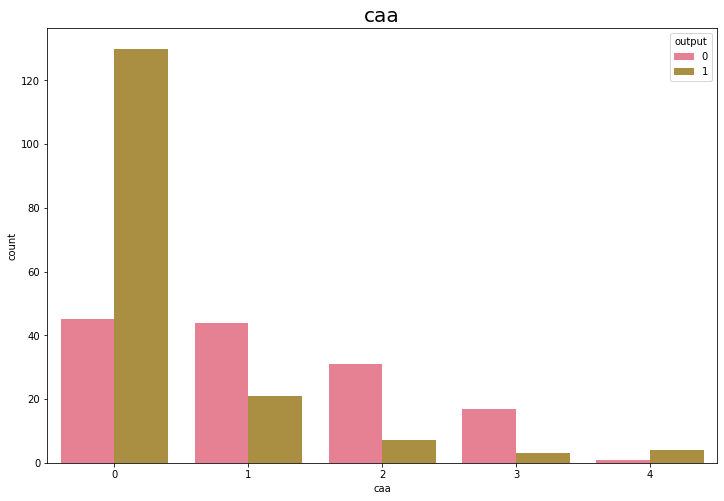

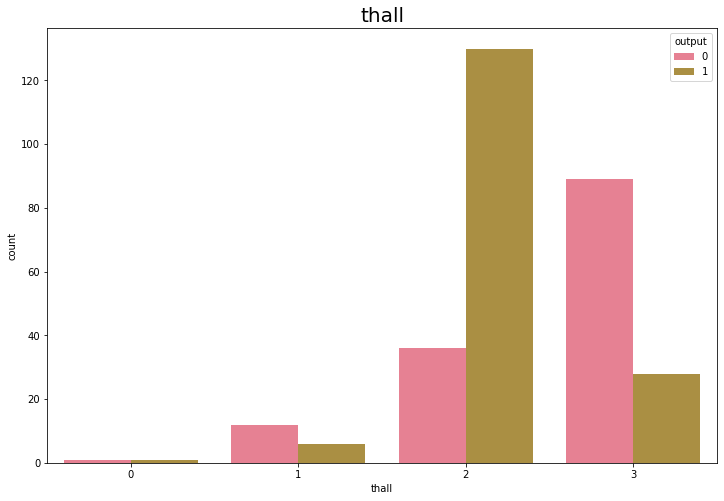

In [35]:
# Analasing all the Categorical Features

for i in categorical_col:
    plt.figure(figsize=(12,8))
    sns.countplot(i,hue='output',data=df_heart)
    plt.title(i,size=20)

In [36]:
# Interpretation: